In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\chukw\Downloads\ML, AI\Udemy ML\data\rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df = df.rename(columns = {'Rebound Signal Strength nHz': 'Signal Strength', 'Rock Density kg/m3':'Rock Density'})

<Axes: xlabel='Signal Strength', ylabel='Rock Density'>

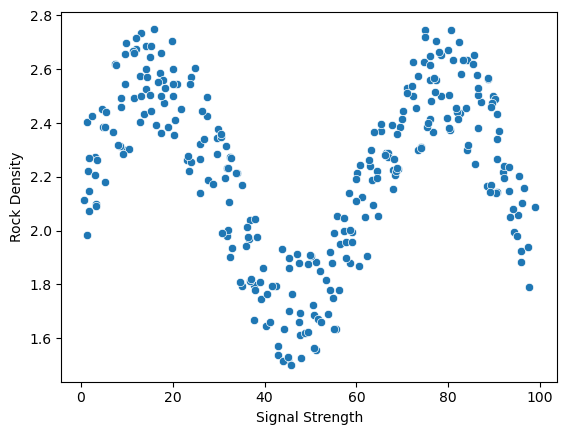

In [4]:
sns.scatterplot(x = 'Signal Strength', y = 'Rock Density', data = df)

In [5]:
X = df['Signal Strength'].values.reshape(-1, 1)
y = df['Rock Density']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
preds = lr.predict(X_test)

In [10]:
from sklearn.metrics import mean_absolute_error

In [11]:
mean_absolute_error(y_test, preds)

0.2369211828242142

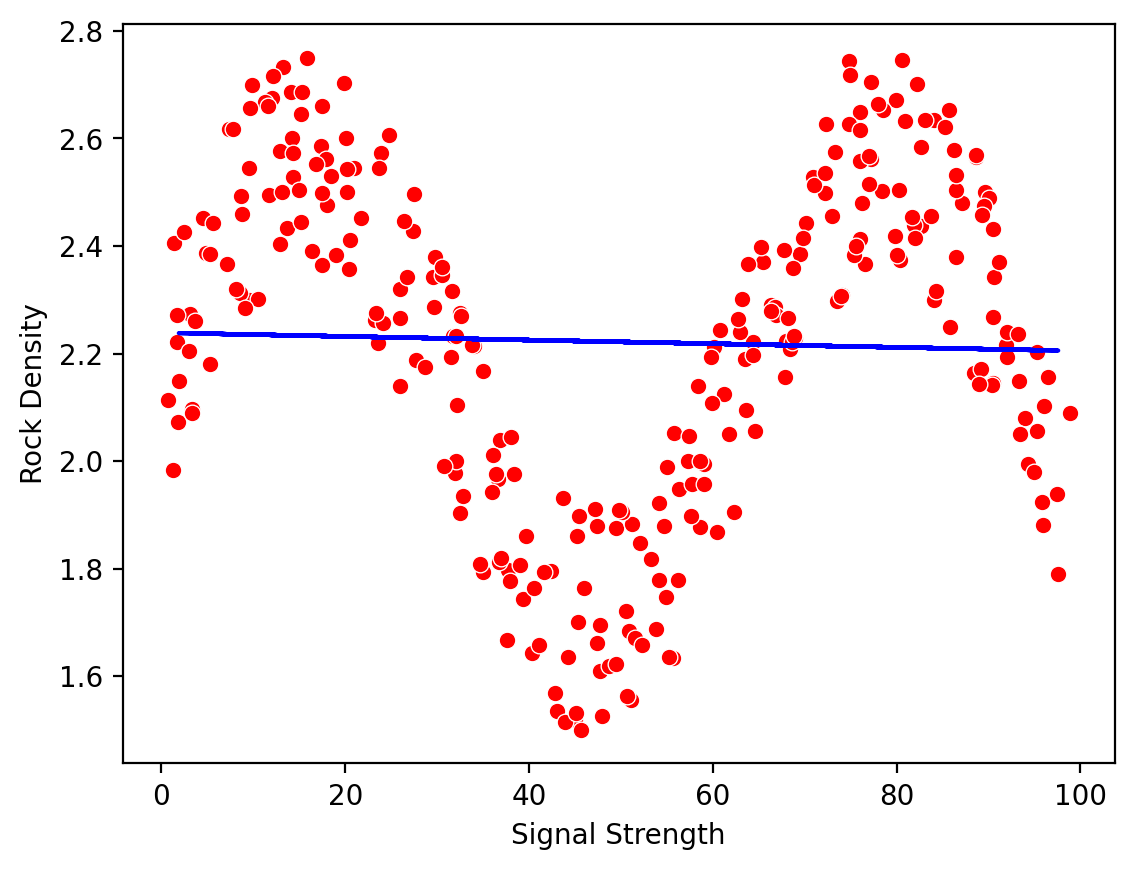

In [12]:
plt.figure(dpi = 200)
sns.scatterplot(x = 'Signal Strength', y = 'Rock Density', data = df, color = 'red')
plt.plot(X_test, preds, color = 'blue')

In [13]:
signal_range = np.arange(0, 100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
signal_pred = lr.predict(signal_range.reshape(-1,1))

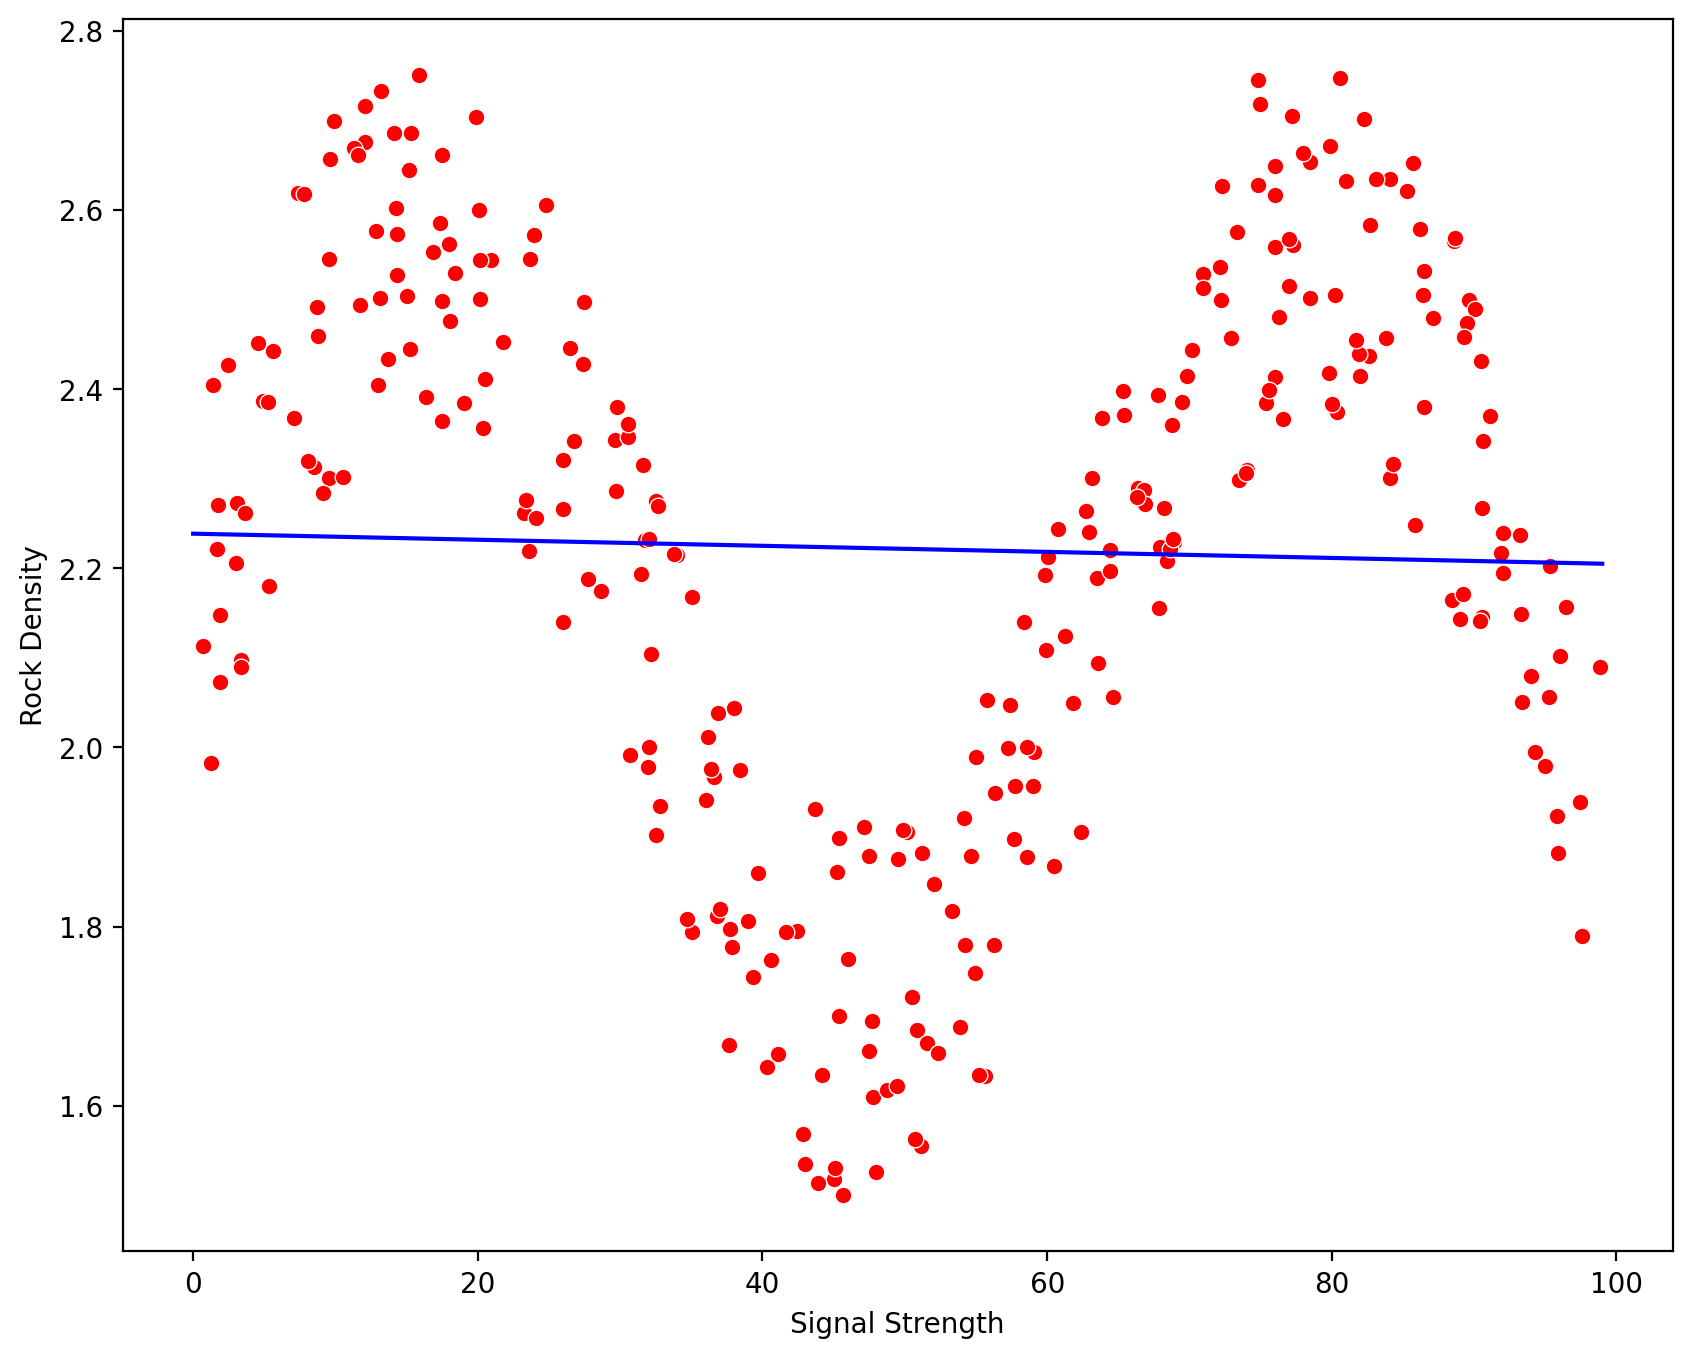

In [15]:
plt.figure(figsize = (10,8), dpi = 200)
sns.scatterplot(x = 'Signal Strength', y = 'Rock Density', data = df, color = 'red')
plt.plot(signal_range, signal_pred, color = 'blue')

### Same dataset with Polynomial regression

In [16]:
def run_model(model,X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    model_pred = model.predict(X_test)
    
    mean_absolute_error(y_test, preds)
    
    signal_range = np.arange(0, 100)
    signal_pred = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize = (10,8), dpi = 200)
    sns.scatterplot(x = 'Signal Strength', y = 'Rock Density', data = df, color = 'red')
    plt.plot(signal_range, signal_pred, color = 'blue')
    
    MAE = mean_absolute_error(y_test, model_pred) 
    print(f"Mean Absolute Error is {MAE}")

Mean Absolute Error is 0.2369211828242142


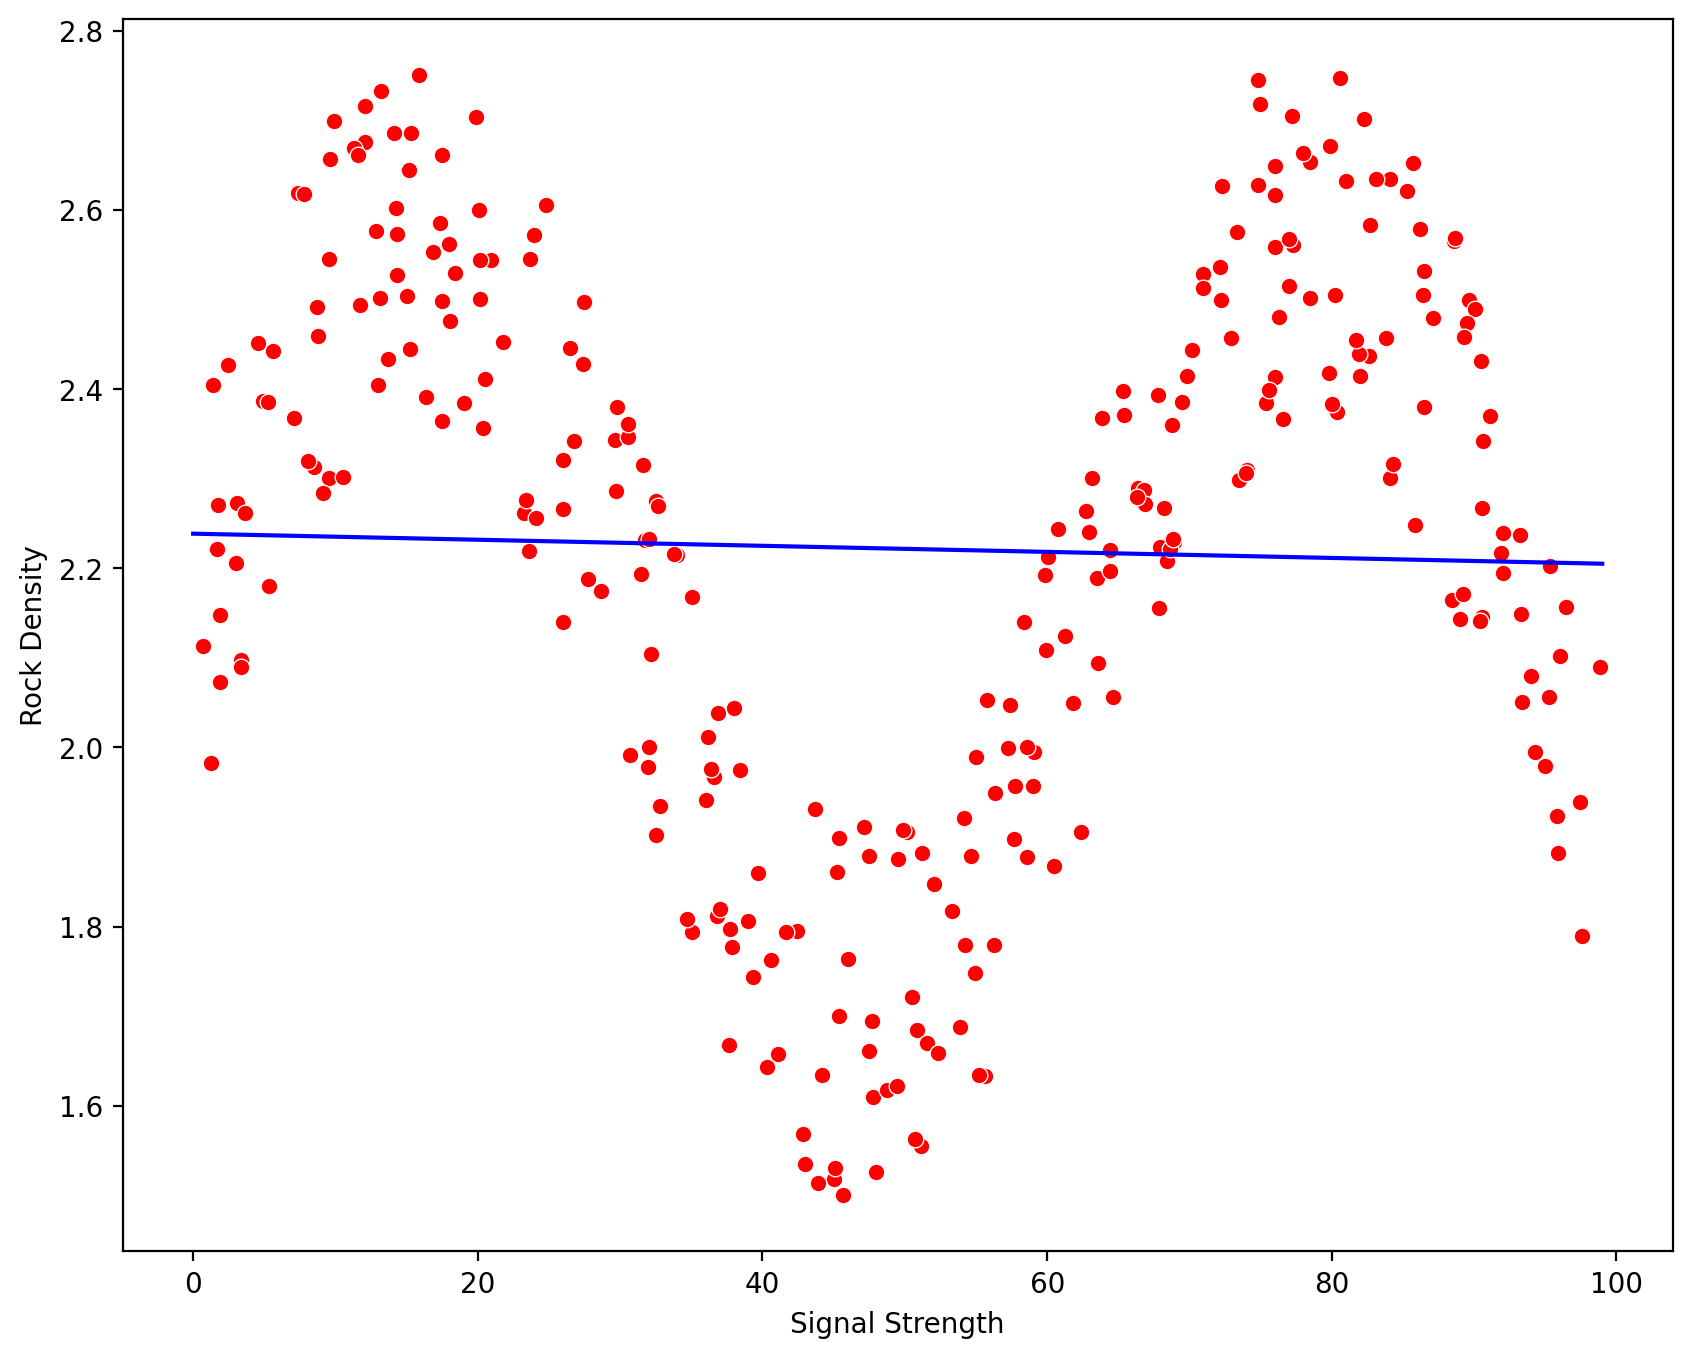

In [17]:
run_model(lr,X_train, y_train, X_test, y_test)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

pipe = make_pipeline(PolynomialFeatures(degree=8, include_bias=False), lr)
pipe

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=False)),
                ('linearregression', LinearRegression())])

Mean Absolute Error is 0.11448684807361202


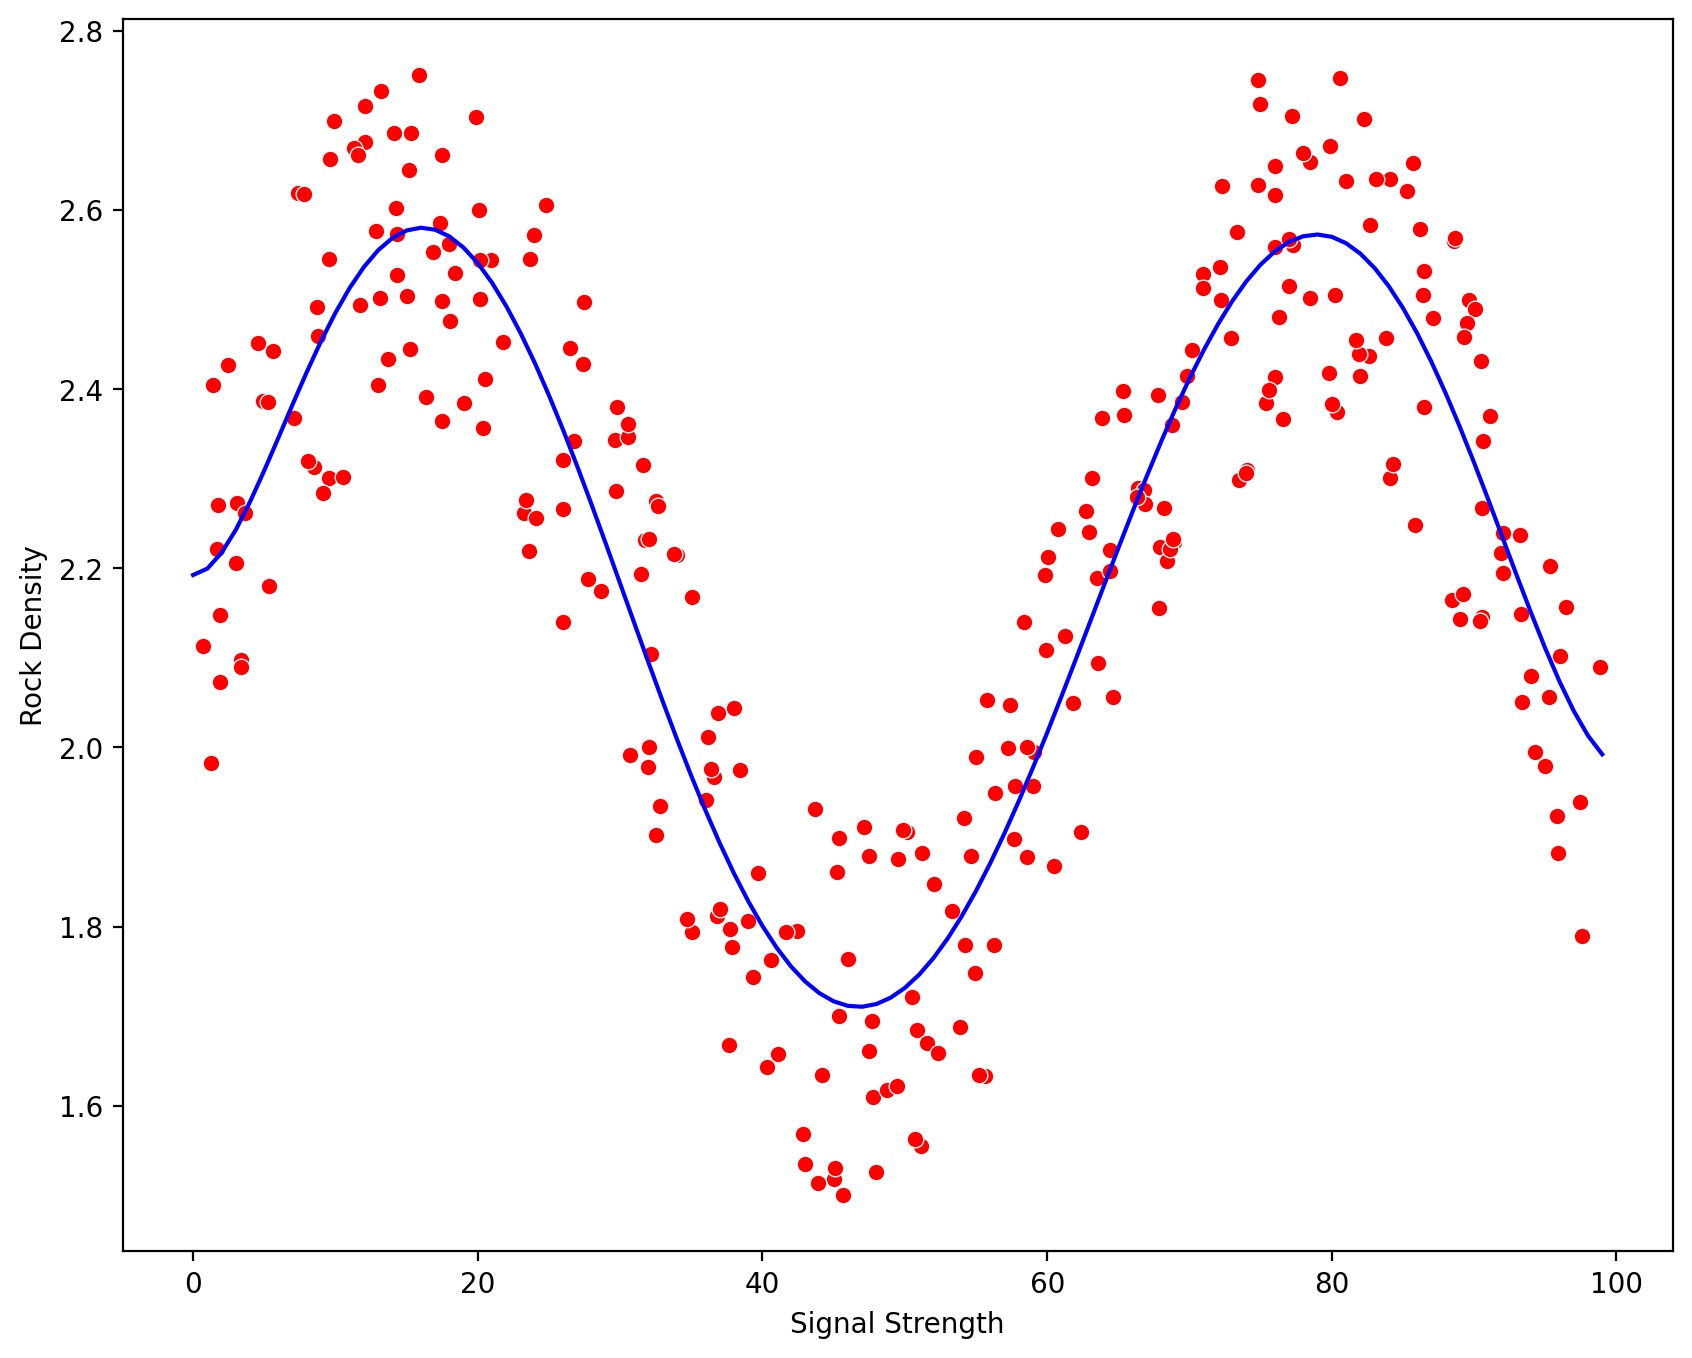

In [19]:
run_model(pipe,X_train, y_train, X_test, y_test)

In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {"kernel": ["rbf", 'poly'], 'C': [0.001, 0.01, 0.1, 1]}
svm = SVR()
grid = GridSearchCV(svm, param_grid)

Mean Absolute Error is 0.11408242011017415


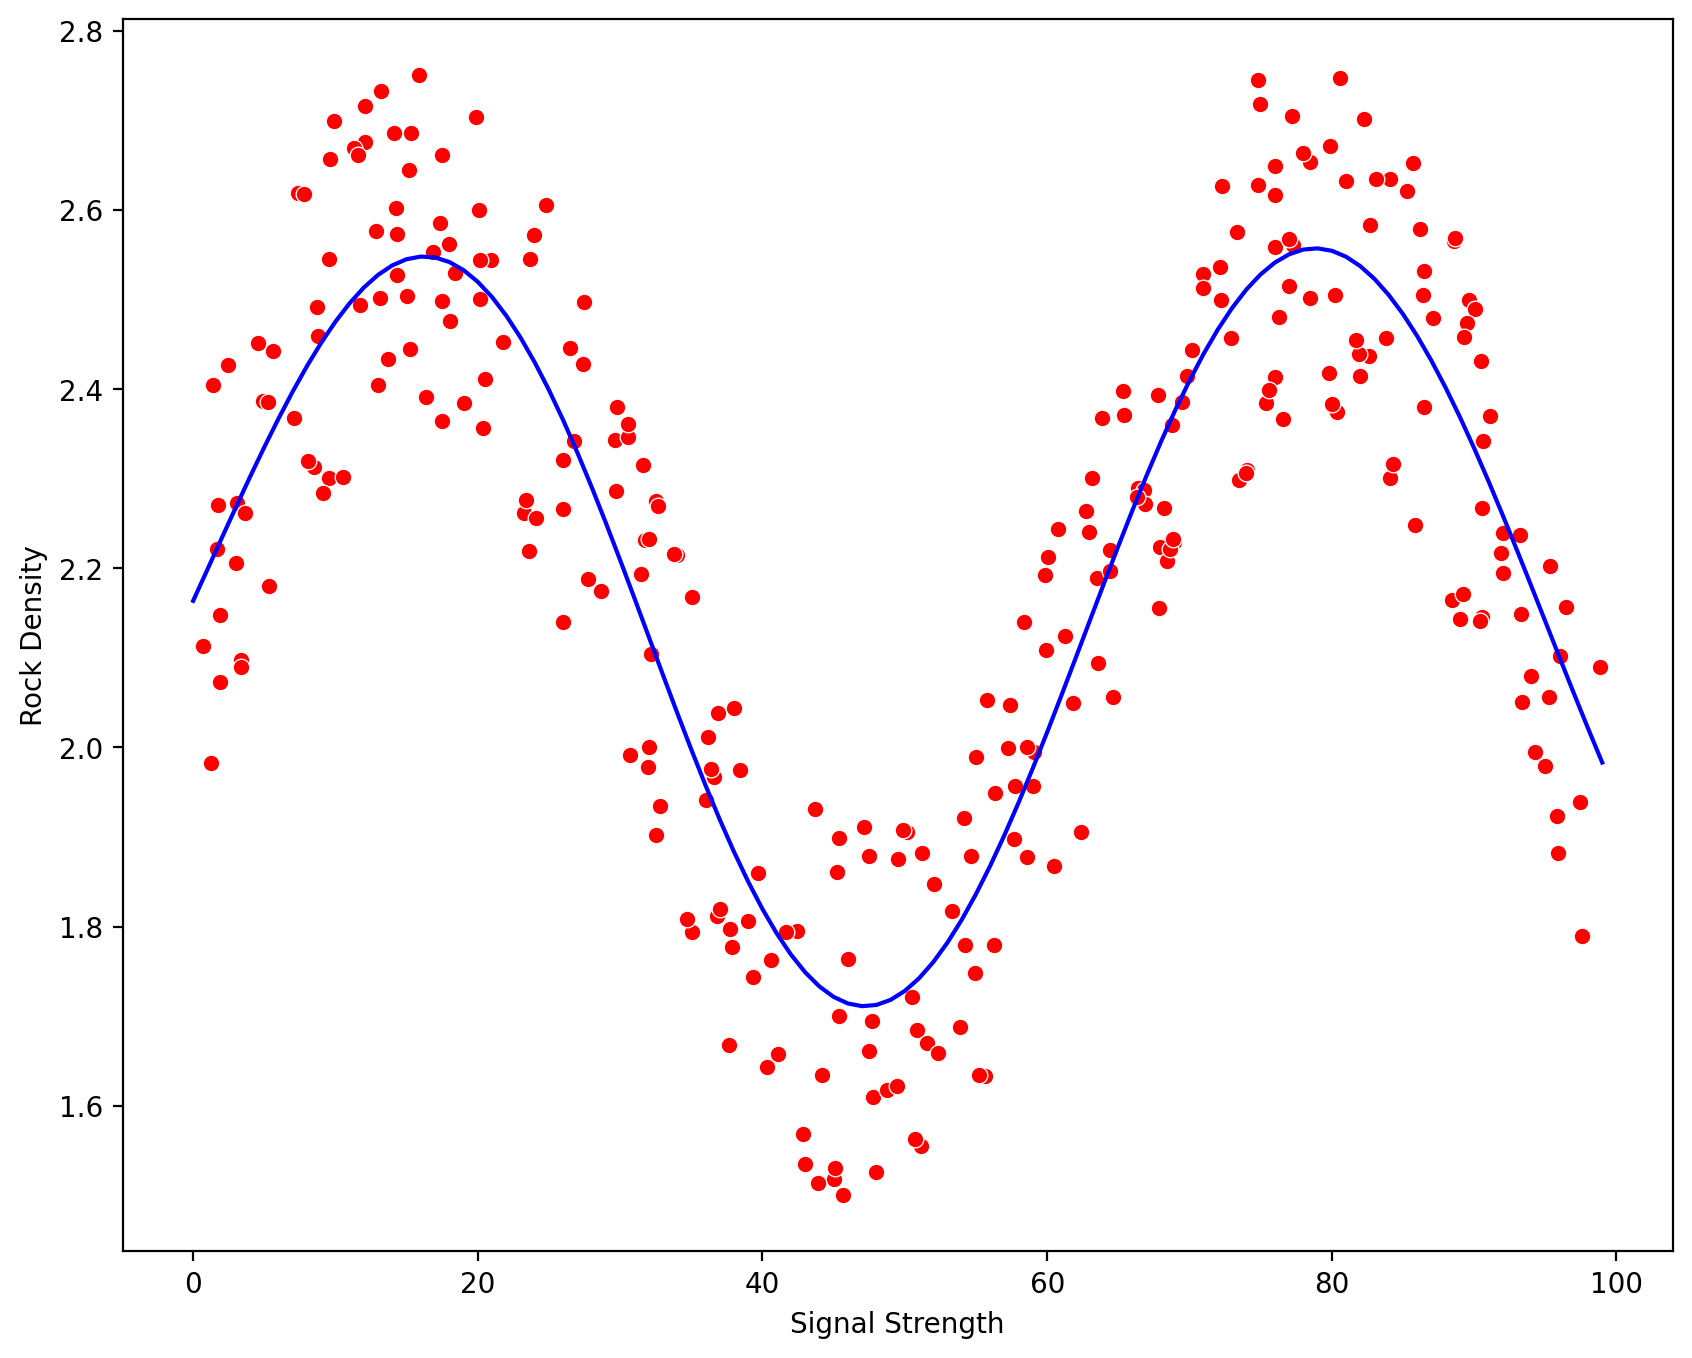

In [21]:
run_model(grid,X_train, y_train, X_test, y_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

param_grid_2 = {'algorithm': ['auto'], 'n_neighbors': [1,5,10,15]}
knn = KNeighborsRegressor()

grid_2 = GridSearchCV(knn, param_grid_2)


Mean Absolute Error is 0.12059189553582521


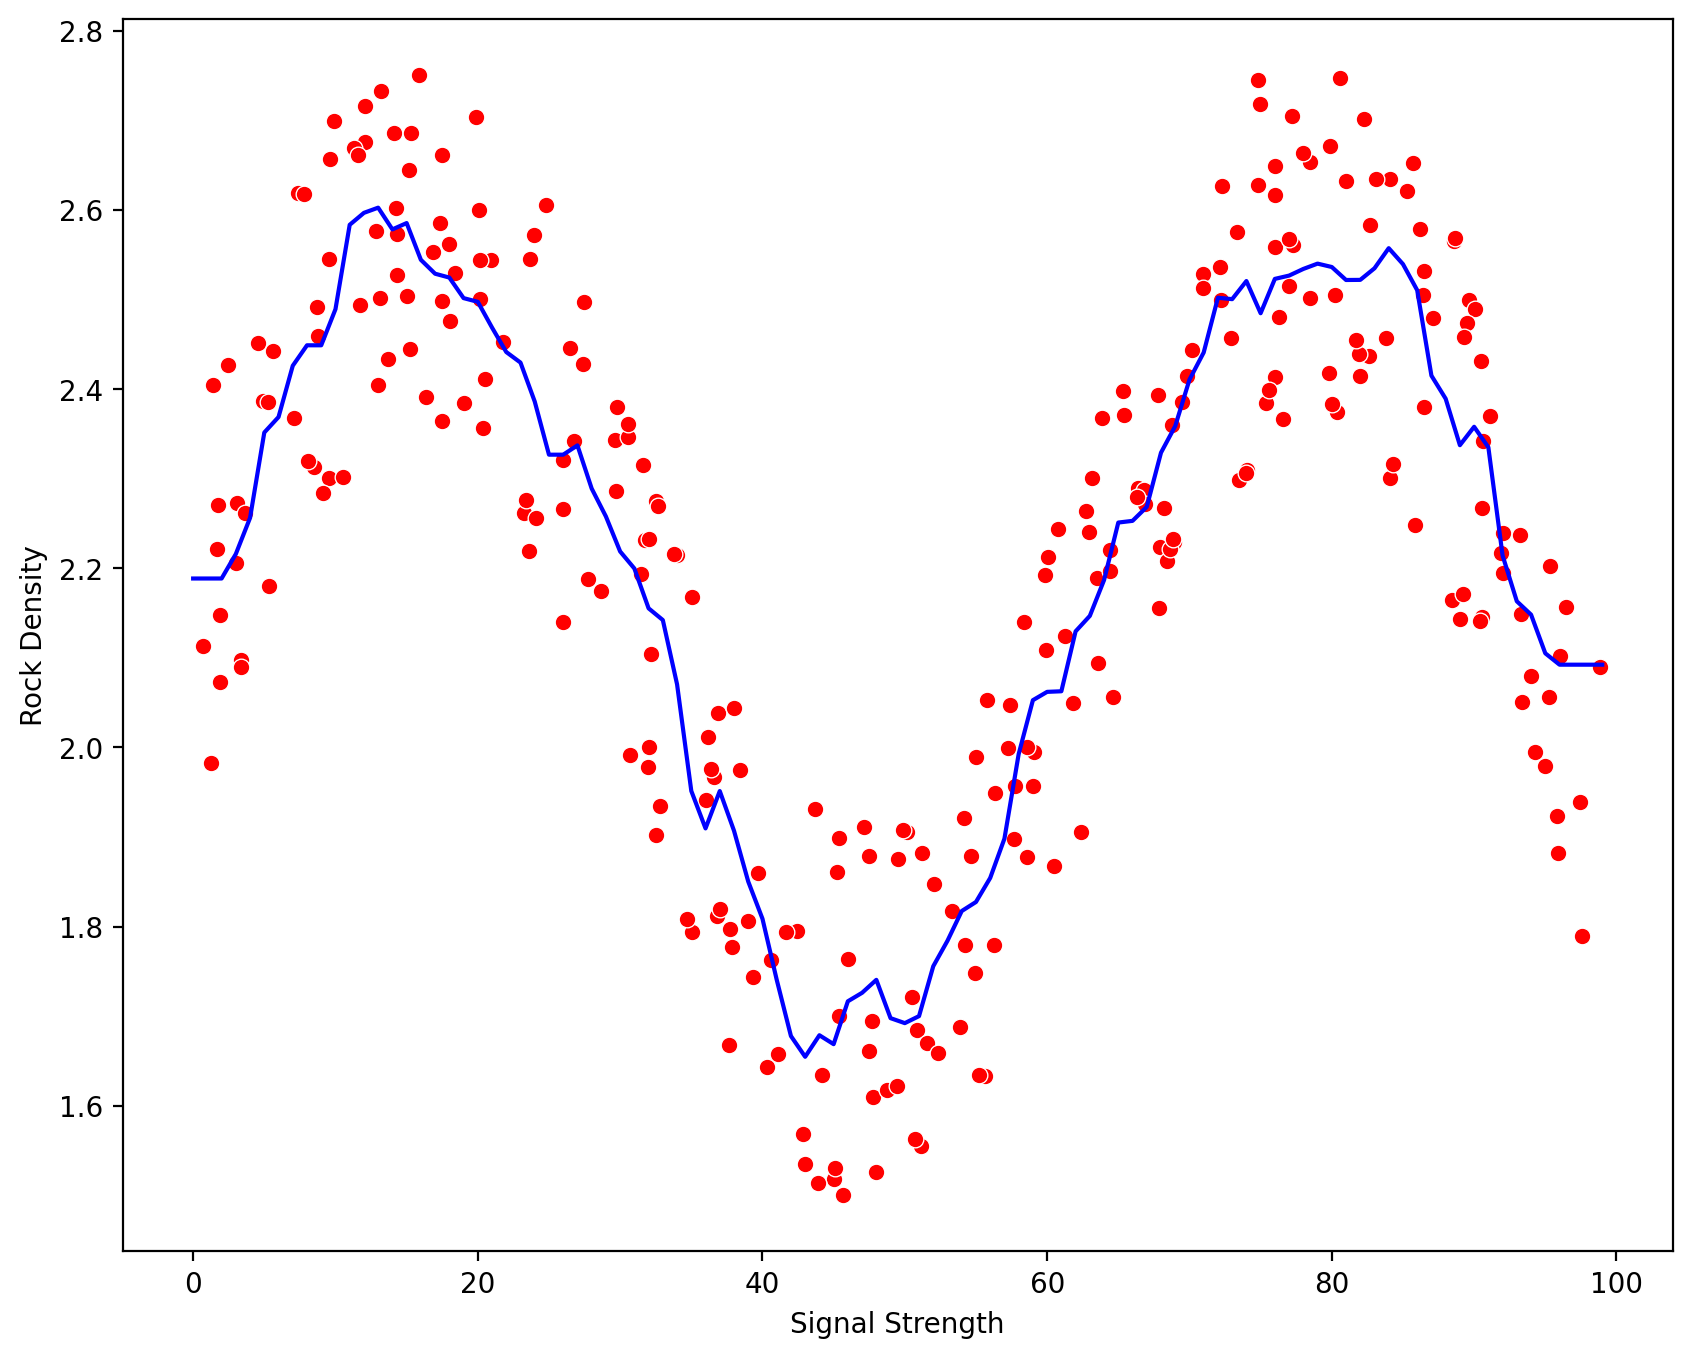

In [23]:
run_model(grid_2,X_train, y_train, X_test, y_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
param_grid_3 = {'n_estimators': [5,10,20], 'bootstrap': [True, False]}

grid_3 = GridSearchCV(rfr, param_grid_3)

Mean Absolute Error is 0.11587809592991943


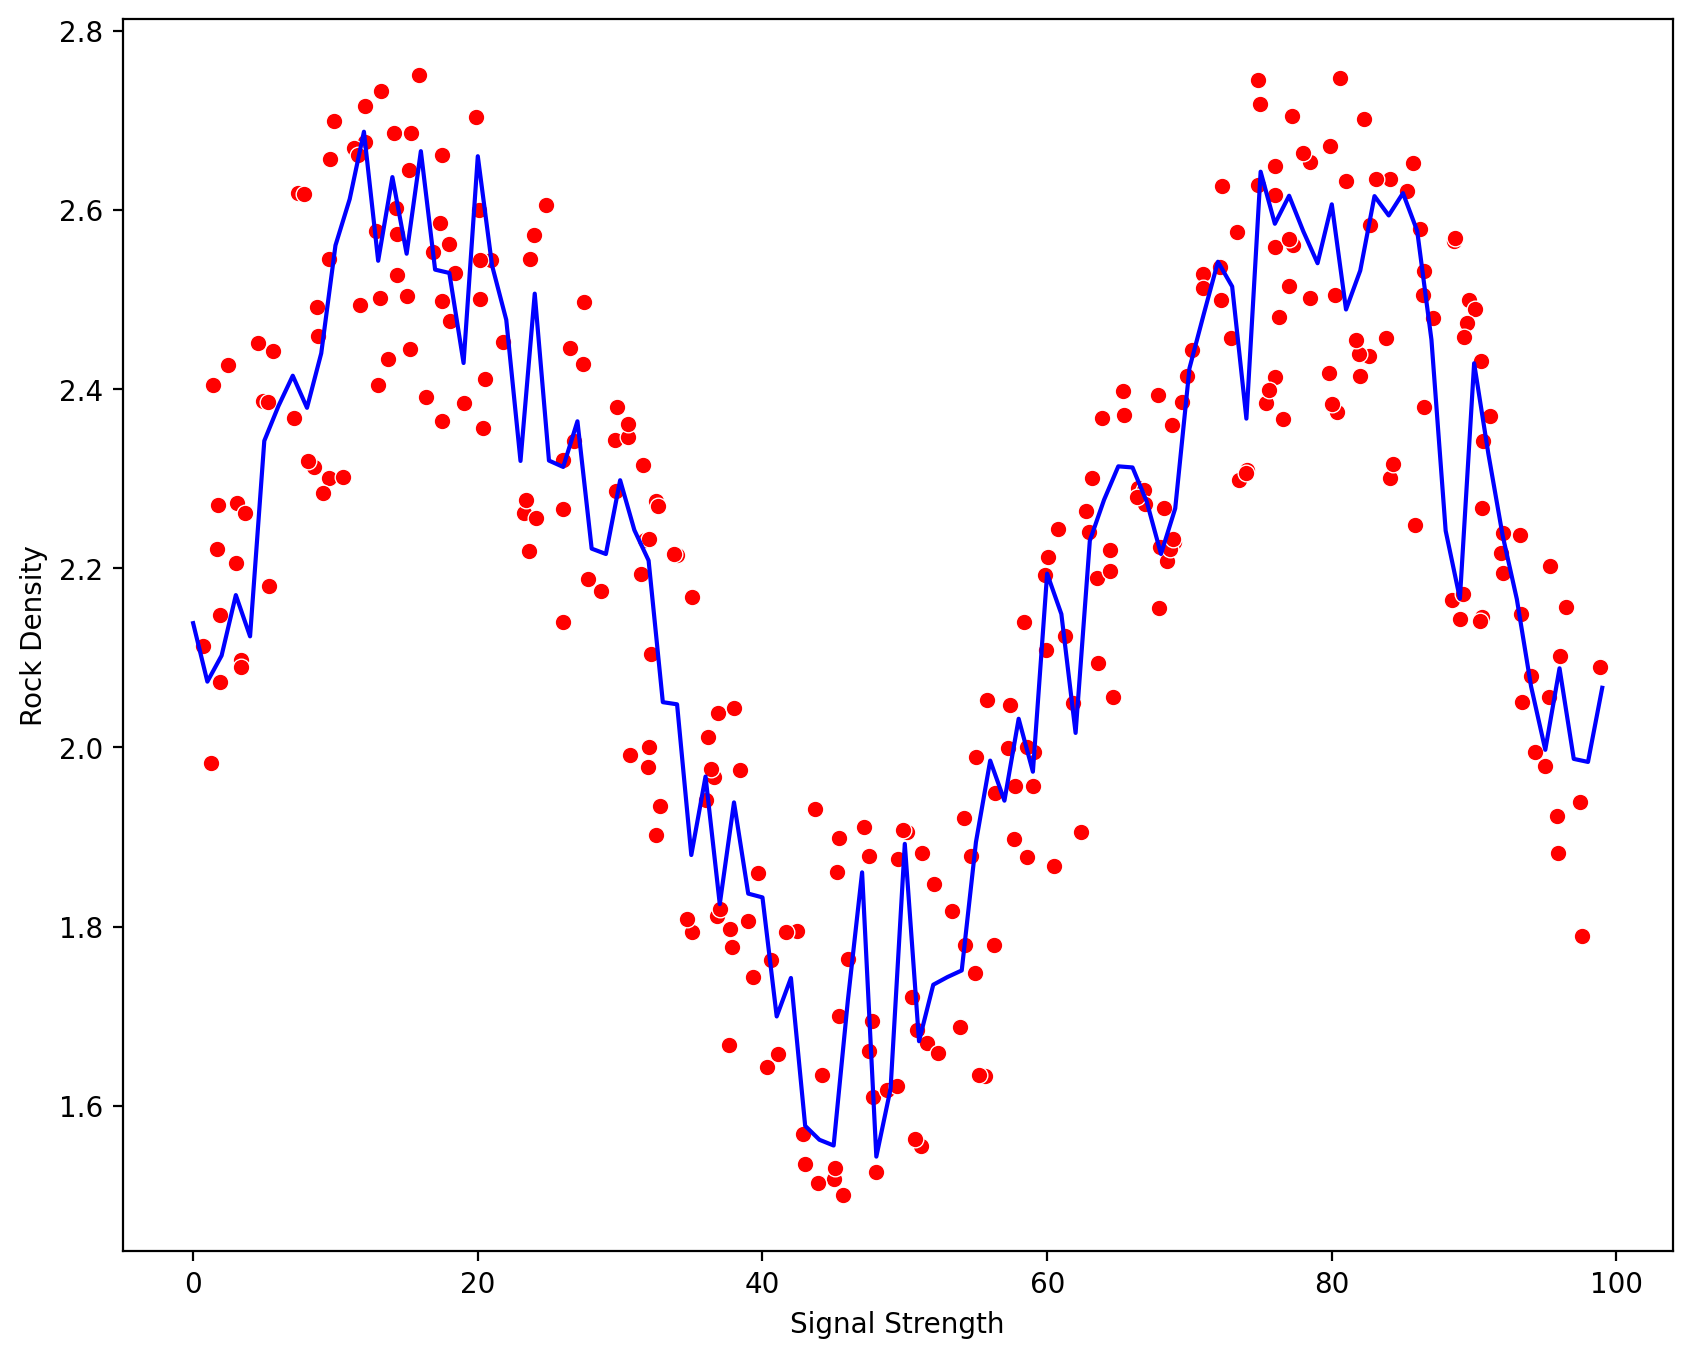

In [25]:
run_model(grid_3,X_train, y_train, X_test, y_test)